# importing required library

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# import the dataset from repo

In [29]:
file_1="Dataset/B0005_dis_dataset.csv"
dataset=pd.read_csv(file_1)

# cleaning dataset

In [30]:
C_max=2

#renaming columns for simplicity
dataset.columns=['cycle',"capacity",'voltage', 'current','temperature', 'current_load', 'voltage_load',"time"]

#removing ideling / starting and ending current level data  

df=dataset[dataset.current<-0.006].reset_index(drop=True)
#df=dataset.copy()
# converting time seconds->hour

df["time"]=df["time"]/3600

# calculating Depth of discharge

In [31]:
#calculate DOD for each cycle
cycle_count=df["cycle"].unique()
DOD_list=[]
# Update DOD for each reading within each cycle using Coulomb counting
for cycle in cycle_count:
    cycle_data = df[df['cycle'] == cycle]
    
    cumulative_DOD = [2.0]
    
    for i in range(1, len(cycle_data)):
        
        delta_time = cycle_data['time'].iloc[i-1] - cycle_data['time'].iloc[i]
        
        delta_charge = cycle_data['current'].iloc[i] * delta_time
        
        cumulative_DOD.append(cumulative_DOD[-1] -delta_charge)
        
    DOD_list.extend(cumulative_DOD)
#DOD is the opposite of the soc 
DOD = [(q / C_max) for q in DOD_list]

df["DOD"]=DOD

In [32]:
train_data, test_data=train_test_split(cycle_count, train_size=0.8, random_state=0)
train_data.sort()
test_data.sort()

In [33]:
X_train = df[df['cycle'].isin(train_data)]
X_test = df[df['cycle'].isin(test_data)]

In [34]:
tp=['cycle','voltage', 'current','temperature', 'current_load', 'voltage_load',"time","DOD"]
ip=["temperature","time","DOD"]
op="voltage"
y_train=X_train.pop(op)
X_train=X_train[ip]

# Training The Random Forest Regressor Model

In [35]:
#making models
rfr_model = RandomForestRegressor(n_estimators=100,random_state=0)
rfr_model.fit(X_train,y_train.values.ravel())

RandomForestRegressor(random_state=0)

In [36]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [37]:
def DOD_plot_rfr(cycle_no):
    # Filter data for the specified cycle
    cycle_data = df[df['cycle'] == cycle_no].copy()

    # Separate features (X) and target variable (y)
    X = cycle_data[ip]
    y = cycle_data[op]


    # Make predictions on the test set
    y_pred = rfr_model.predict(X)

    # Calculate mean squared error on the test set
    rmse = np.sqrt(metrics.mean_squared_error(y,y_pred ))
    mape = MAPE(y,y_pred)
    print(f'Root Mean Squared Error: {rmse}')
    print(f"MAPE : {mape}")
    
    # Plot the actual vs predicted SOC
    plt.figure(figsize=(5.1, 2.5))
    plt.xlim([0,1])
    plt.ylim([0,5])
    plt.grid(linestyle=' ')
    plt.ylabel(op)
    plt.xlabel('DOD')
    plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.yticks([0,1,2,3,4,5])
    plt.scatter(X["DOD"] , y, color='red', label='Measured Terminal Voltage',s=10)
    plt.scatter(X["DOD"] , y_pred, color='blue', label='Predicted Terminal Voltage',s=1)
    plt.title(f'Random forest regressor_node(100) (Cycle {cycle_no})',fontweight="bold",fontsize="10")
    plt.legend(loc="lower right",fontsize="8")
    plt.show()

cycle no = 6
Root Mean Squared Error: 0.025947890499543706
MAPE : 0.0031246014311108626


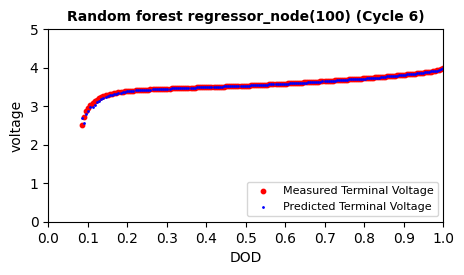

cycle no = 8
Root Mean Squared Error: 0.0235070349970307
MAPE : 0.0032570742671370364


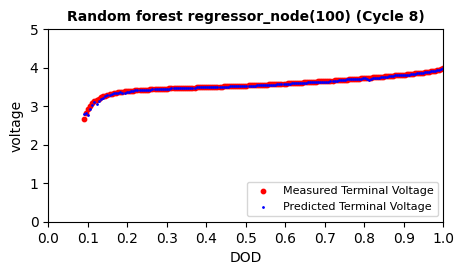

cycle no = 9
Root Mean Squared Error: 0.018522120616927405
MAPE : 0.002479131847260295


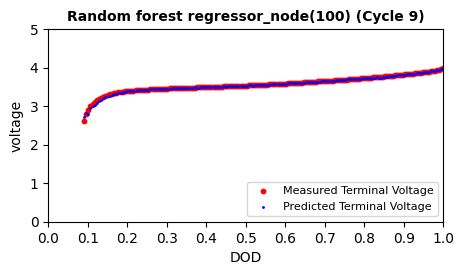

cycle no = 27
Root Mean Squared Error: 0.028421561723842307
MAPE : 0.0025670864623971975


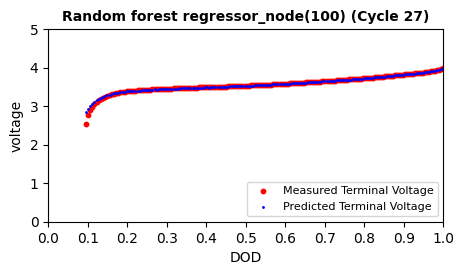

cycle no = 34
Root Mean Squared Error: 0.025929188703610065
MAPE : 0.0040639218469696765


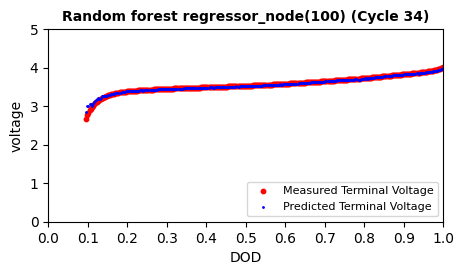

cycle no = 38
Root Mean Squared Error: 0.029224635690284734
MAPE : 0.0036989420258677908


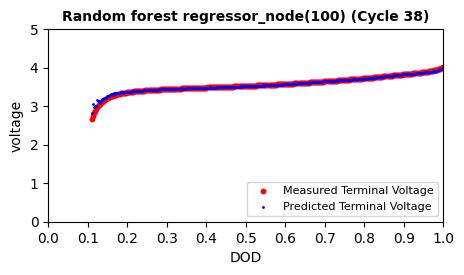

cycle no = 46
Root Mean Squared Error: 0.030054093746490384
MAPE : 0.00459897802462473


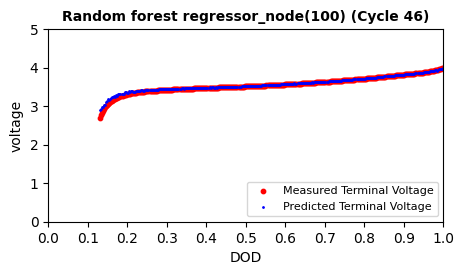

cycle no = 52
Root Mean Squared Error: 0.025535853469827053
MAPE : 0.005574732197907715


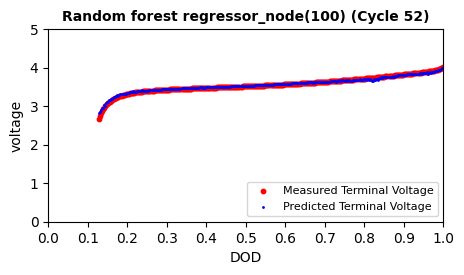

cycle no = 55
Root Mean Squared Error: 0.04699181088916667
MAPE : 0.007696557878607769


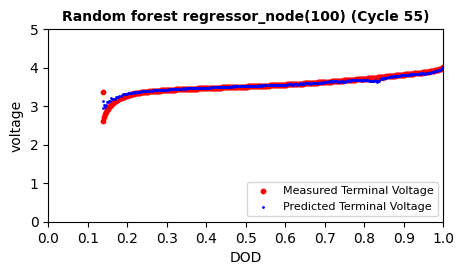

cycle no = 56
Root Mean Squared Error: 0.05137231171660847
MAPE : 0.008163004235434316


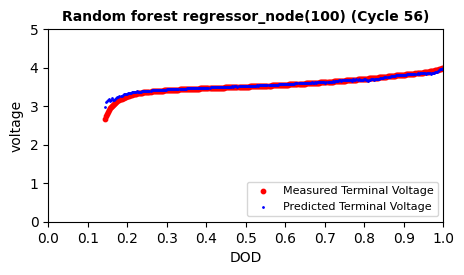

cycle no = 57
Root Mean Squared Error: 0.05709407392703225
MAPE : 0.009326938183687973


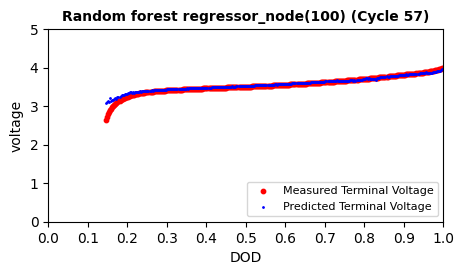

cycle no = 61
Root Mean Squared Error: 0.03614176785511379
MAPE : 0.00557637741582594


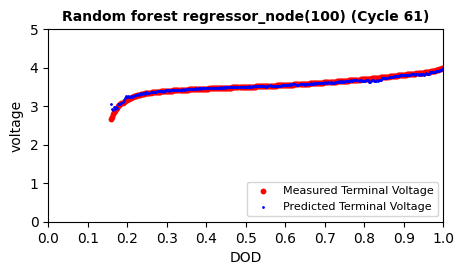

cycle no = 74
Root Mean Squared Error: 0.0171437079835189
MAPE : 0.00366598668075686


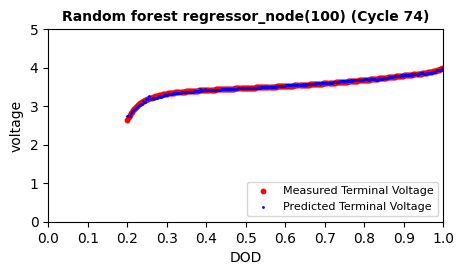

cycle no = 75
Root Mean Squared Error: 0.018765790002427344
MAPE : 0.003883403345524754


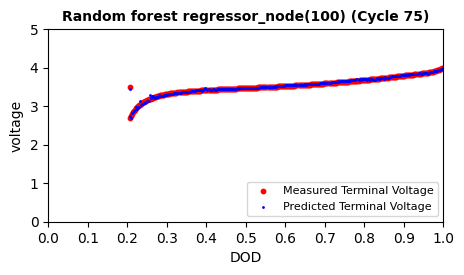

cycle no = 87
Root Mean Squared Error: 0.03811243716711201
MAPE : 0.008904003120333228


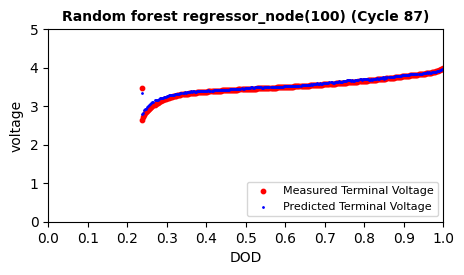

cycle no = 95
Root Mean Squared Error: 0.02547665747586376
MAPE : 0.00523003544673705


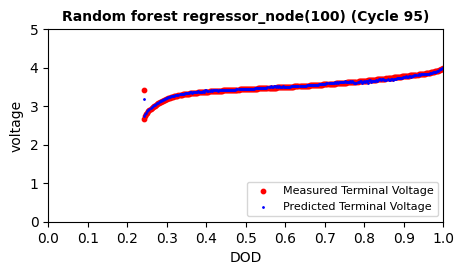

cycle no = 97
Root Mean Squared Error: 0.015393618245787864
MAPE : 0.0034874608102226866


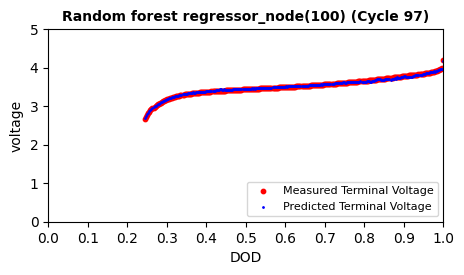

cycle no = 98
Root Mean Squared Error: 0.01875660386543483
MAPE : 0.0038936883322150955


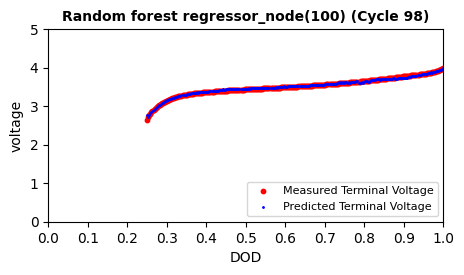

cycle no = 101
Root Mean Squared Error: 0.015600483299852388
MAPE : 0.0034018923850801315


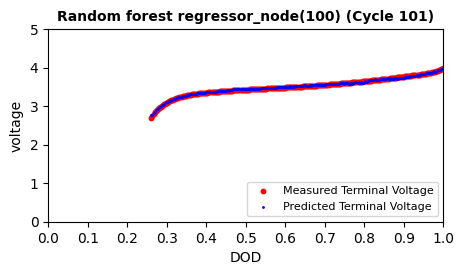

cycle no = 102
Root Mean Squared Error: 0.023435872109359802
MAPE : 0.004939768072847549


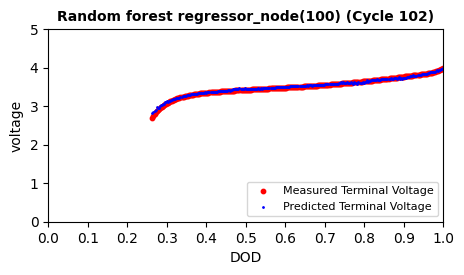

cycle no = 107
Root Mean Squared Error: 0.030412738214771296
MAPE : 0.00671755561611138


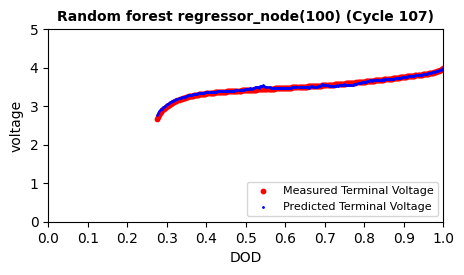

cycle no = 108
Root Mean Squared Error: 0.029823864233230194
MAPE : 0.006114942062037052


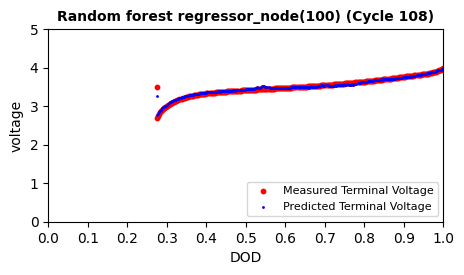

cycle no = 109
Root Mean Squared Error: 0.018645394732987056
MAPE : 0.00435880328046838


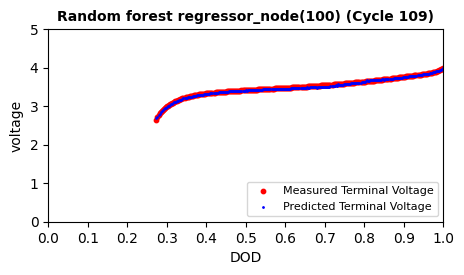

cycle no = 123
Root Mean Squared Error: 0.019139385958728102
MAPE : 0.003850895260078667


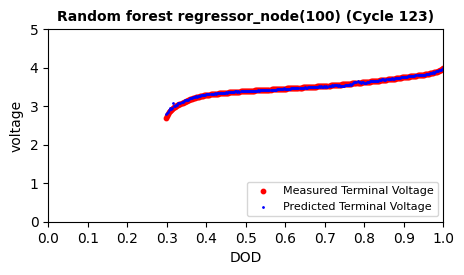

cycle no = 124
Root Mean Squared Error: 0.02125519355827457
MAPE : 0.004385600411142388


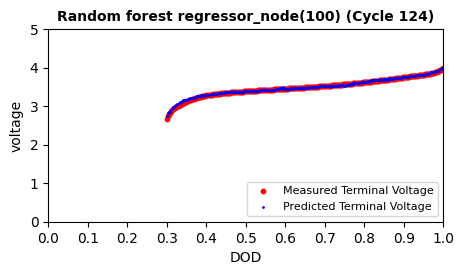

cycle no = 136
Root Mean Squared Error: 0.018746872844712395
MAPE : 0.00423702762569762


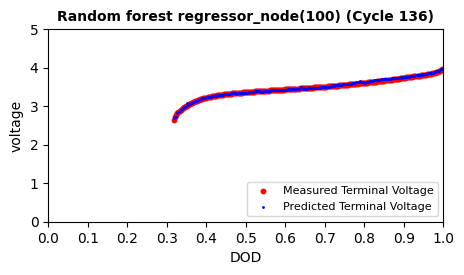

cycle no = 140
Root Mean Squared Error: 0.026247817992525853
MAPE : 0.006691944682311351


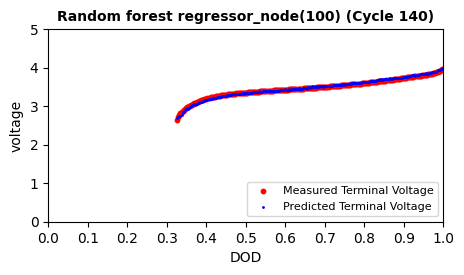

cycle no = 144
Root Mean Squared Error: 0.03182204519609014
MAPE : 0.007702243420659155


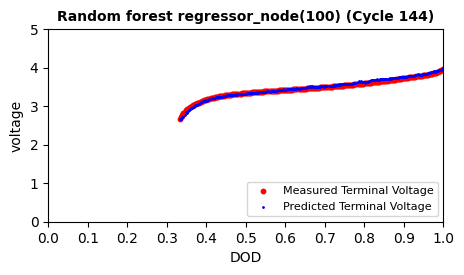

cycle no = 151
Root Mean Squared Error: 0.020244344452754946
MAPE : 0.0045920659221671215


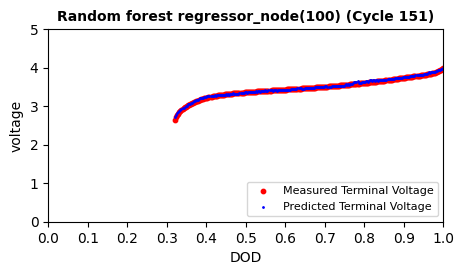

cycle no = 152
Root Mean Squared Error: 0.0261902716076319
MAPE : 0.005450985651162829


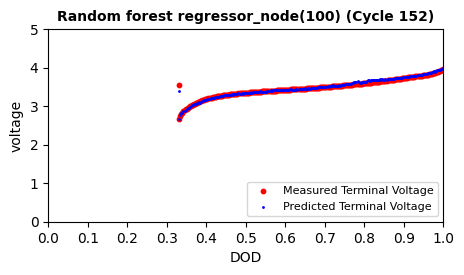

cycle no = 153
Root Mean Squared Error: 0.023960523951025138
MAPE : 0.005090941442186818


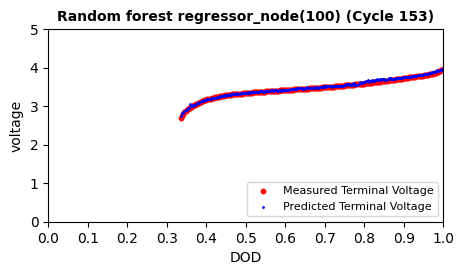

cycle no = 156
Root Mean Squared Error: 0.03181400162966819
MAPE : 0.008155610166273582


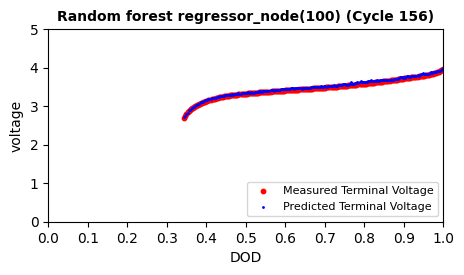

cycle no = 158
Root Mean Squared Error: 0.03575825860154287
MAPE : 0.009098179133080581


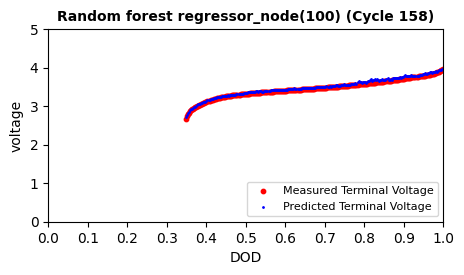

cycle no = 167
Root Mean Squared Error: 0.03342447873941853
MAPE : 0.008711435014110595


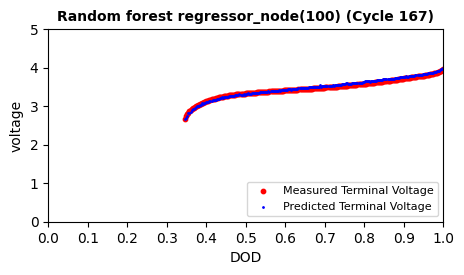

In [38]:
for i in test_data:
    print(f"cycle no = {i}")
    DOD_plot_rfr(i)